## <center>**$\text{Projet de Calcul Quantique}$**</center>
 ### <center>**$\text{M2 Ingénierie Mathématique Pour l'Entreprise}$**</center>
 #### <center>**$\textit{Paul Le Franc, Wassim Taher, Franck-kabrel Ewane Ngoupe}$**</center>
<br>
<br>
<br>

$\text{Le but de ce projet est de montrer une application de l'algorithme de Grover.}$

$ \text{Soit n un entier fixé. On pose } N=2^n \text{ et on définie la fonction}$


\begin{matrix}
f_{\bar{k}} : \{0,\, 1, \dots,\, N-1\} & \to & \{0, \,1\}\\ 
\end{matrix}

\begin{matrix}
&&&&&&&&&&&&&&&&&&&&&&&&&&&& k && \mapsto &f_{\bar{k}}(k) =
\begin{cases} 
1 & \text{si } k = \bar{k} &&&&&&&&&&&&(1)\\
0 & \text{sinon} 
\end{cases}
\end{matrix}

$f_{\bar{k}}(k) \text{ modélise un problème de recherche dans une liste non ordonnée. }$





##### **$\underline{\textbf{Question 1 - Application à un problème de cryptographie}}$**
<br>

$\text{Soit un entier }E = E_0 \cdot E_1 \text{ tel que }E_0 \text{ et } E_1\text{ soient deux nombres premiers et on a:}$

 - $0 < E_0 \leq 2^n - 1$
 - $E_1 > 2^n - 1$

$\text{On cherche à déterminer la valeur de } E_0  \text{ sachant celle de } E$ .  

$\text{Pour cela, on considère la fonction:}$
$$
f(x) = 
\begin{cases} 
1 & \text{si } x \text{ divise } E \\
0 & \text{sinon} 
\end{cases}
$$
<br>
<br>

>##### **$\textit{1. Problème de recherche dans une liste non ordonnée avec f}$**

$\text{Dans le problème de recherche de } E_0 \text{ on a } x \in\{1,\, 2, \dots,\, 2^n - 1 \} \text{ par l'hypothèse } 0 < E_0 \leq 2^n - 1.$

$\text{Comme }E_0 \text{ et }E_1\text{ sont premiers, l'unique entier k compris entre 0 et }2^n -1 \text{ divisant }E\text{ est }E_0 \text{ donc } f_{\bar{k}}\text{ vaut 1 en }E_0 \text{ et 0 sinon.}$

$\text{Ainsi, pour }\bar{k}=E_0 \text{ la fonction f est de }$`la même forme` $ \text{que } f_{\bar{k}}.$ 

```python
def f(x, E):
    return 1 if E % x == 0 else 0
```

>##### **$\textit{2. Recherche classique}$**

$\text{Dans le cas classique et simple, il suffit de voir si l'element est divisible par }E_0.$

```python
def recherche_classique(E, n):
    """Recherche de E0 de 2 à 2^n - 1 qui divise E"""
    for x in range(2, 2**n):
        if E % x == 0:
            return x
    return None
```

>##### **$\textit{3. Nombre d'appels de la fonction f}$**

$\text{Dans le pire des cas, }E_0 \text{ est le dernier élément de la liste. Le nombre de valeurs à tester est donc } 2^n-2.$
$\text{L'ordre de grandeur du nombre d'opérations dans le pire des cas est donc } \mathcal{O}(2^n)$.





##### **$\underline{\textbf{Question 2 - Oracle quantique et transformation des fonctions classiques}}$**

>##### **$\textit{1. Transformation d'une fonction classique en porte réversible}$**
Soit $f : x \to f(x)$ une fonction classique non réversible avec $f : \{0,\, 1\}^n → \{0,\, 1\}$.
On souhaite transformer cette fonction en une porte réversible $U_f$ définie par :
$$
U_f : (x,\, y) \to (x, y \oplus f(x)) \text{ où } x \in \{0,\, 1\}^n \text{ et } y \in \{0,\, 1\}.
$$

Explication :
- On ajoute un "registre auxiliaire" y initialisé à 0 ou 1.
- y est modifié par $f(x)$ à l'aide de l'opération XOR $(\oplus)$.
- Si y = 0, alors y devient $f(x)$.  
  Si y = 1, alors y devient 1 $\oplus f(x)$ ( l'inverse de $f(x)$ ).

Calcul de $U_f^\dagger$ :
L'opérateur $U_f$ est sa propre inverse. En effet, si on applique deux fois la transformation :
$$U_f ◦ U_f (x, y) = (x, (y ⊕ f(x)) ⊕ f(x)) = (x, \,y \oplus 0) = (x,\, y)$$
Donc, $ U_f$ est unitaire, ce qui signifie que $U_f^† = U_f$.

>##### **$\textit{2. Propriété de l'oracle }U_f$**
Montrons que   $U_f |x, -\rangle = (-1)^{f(x)} |x, -\rangle$

On rappelle que le qubit $|-\rangle$ est défini comme : $|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$.

Soit le système initial $|x\rangle \otimes |-\rangle$. On applique $U_f$ :

$$U_f|x\rangle \otimes |-\rangle = |x\rangle \otimes U_f|-\rangle$$

Calcul de $U_f$ sur $|-\rangle$ :

$$U_f|-\rangle = \frac{1}{\sqrt{2}} U_f|0\rangle - \frac{1}{\sqrt{2}} U_f|1\rangle$$

On sait que $U_f|y\rangle = |y \oplus f(x)\rangle$.  
Donc :
- $U_f|0\rangle = |f(x)\rangle$
- $U_f|1\rangle = |1 \oplus f(x)\rangle$

En remplaçant, on obtient :

$$U_f|-\rangle = \frac{1}{\sqrt{2}} |f(x)\rangle - \frac{1}{\sqrt{2}} |1 \oplus f(x)\rangle$$

On en déduit: 

- $U_f|-\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle = |-\rangle$ ,  si $f(x) = 0$

- $U_f|-\rangle = \frac{1}{\sqrt{2}} |1\rangle - \frac{1}{\sqrt{2}} |0\rangle = -|-\rangle$ ,  si $f(x) = 1$

En conclusion, on a bien la propriété :

$$U_f |x, -\rangle = (-1)^{f(x)} |x, -\rangle$$


In [1]:
from qat.lang.AQASM import QRoutine, X, CNOT, Program, H, Z,AbstractGate
from qat.qpus import PyLinalg
import matplotlib.pyplot as plt

$\text{Dans la suite nous nous placons dans le cas où il y a 5 qubits, dont 1 qubit auxiliaire. Nous cherchons a étudier }\bar{k}.$

$\text{On a}$
 - $\bar{k}=5$
 - $n=4\text{ , sans le qubit auxilliaire.}$

In [2]:
n = 4
k = 5

>##### **$\textit{3. Programmation de l'oracle Uf}$**

In [3]:
def oracle_f():   
    oracleUf = QRoutine()
    wires = oracleUf.new_wires(n + 1)  # n qubits de recherche + 1 qubit auxiliaire
    # Étape 1 : Appliquer X là où les qubits sont initialement à l'état 0
    for i in range(n):
        if not (k & (1 << i)):  # Si le bit i de k est 0, on applique X au i-ème qubit
            oracleUf.apply(X, wires[i])

    # Étape 2 : Application du Multi-X 
    if n == 1:
        oracleUf.apply(CNOT, wires[0], wires[1])
    elif n == 2:
        oracleUf.apply(CNOT.ctrl(2), wires[:n]+ [wires[2]] )
    else:
        # Pour n > 2, on fait une porte Toffoli
        oracleUf.apply(X.ctrl(n), wires[:n]+ [wires[n]])
        
    # Étape 3 : appliquer X aux mêmes qubits que précédemment pour restaurer les qubits modifiés
    for i in range(n):
        if not (k & (1 << i)):  # Si le bit i de k est 0, on applique X au i-ème qubit
            oracleUf.apply(X, wires[i])

    return oracleUf

>##### **$\textit{4. Test de l'oracle Uf}$**

##### $\text{Test 1: }\textit{On initialise un 4-qubit à }\bar{k}=5$

State |10101>, amplitude (1+0j), probability 1.0


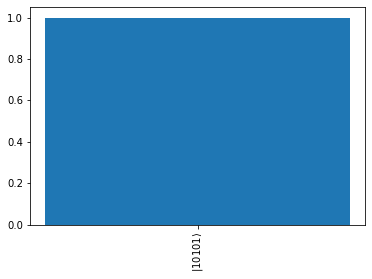

In [4]:
p = Program()
qbits = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# Initialiser l'état |x> à la valeur k_bar (pour tester le cas où x = k_bar)
# Application de l'oracle
oracle = oracle_f()  # On génère l'oracle
p.apply(X, qbits[2])
p.apply(X, qbits[0])
p.apply(oracle, qbits)  # On applique l'oracle

circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

``Notation: dans jupyter, le dernier qubit est à droite et le premier à gauche.``

$\text{Le dernier qubit est bien égale à 1 car le n-qubit entré valait 5}=\bar{k}$

In [5]:
# Dorénavant l'oracle sera noté Uf
Uf = AbstractGate("Uf", [])
Uf.set_circuit_generator(oracle_f)

##### $\text{Test 2: }\textit{On initialise un 4-qubit à 4}\neq\bar{k}$

State |00100>, amplitude (1+0j), probability 1.0


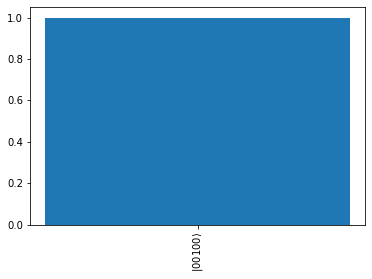

In [6]:
p2 = Program()
wires2= p2.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# Application de l'oracle avec un qbit faux
p2.apply(X, wires2[2])
p2.apply(Uf(), wires2)

circuit2 = p2.to_circ(box_routines=False)
circuit2.display()

# Exécution du circuit
circuit2 = p2.to_circ(submatrices_only=False)
result2 = PyLinalg().submit(circuit2.to_job())
for sample2 in result2:
    print("State %s, amplitude %s, probability %s" % (sample2.state, sample2.amplitude, sample2.probability))
result2.plot()

$\text{Le dernier qubit est bien égale à 0 car le n-qubit de départ ne valait pas 5.}$

>##### **$\textit{5. Test de l'oracle Uf avec ket moins}$**
$\text{On initialise le registre auxiliaire dans l'état } ∣−⟩ \text{ au lieu de }∣0⟩. \text{ On applique l'oracle et on vérifie qu'on a bien:}$
$U_f |x, -\rangle = (-1)^{f(x)} |x, -\rangle$

State |10100>, amplitude (-0.7071067811865475+0j), probability 0.4999999999999999
State |10101>, amplitude (0.7071067811865475+0j), probability 0.4999999999999999


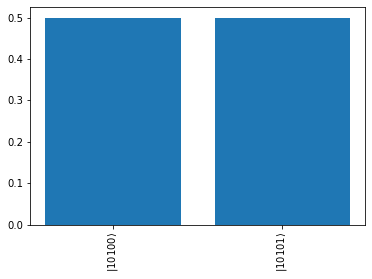

In [7]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# Application de l'oracle avec un qubit correct
p.apply(X, wires[2])
p.apply(X, wires[0])

# Initialiser le qubit auxiliaire à |−⟩ = (|0⟩ - |1⟩) / sqrt(2)
p.apply(X, wires[n])
p.apply(H, wires[n]) 

# Application de l'oracle
p.apply(Uf(), wires)  

circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

$\text{On remarque que quand le dernier qubit correspond à l'état -∣−⟩}.$

$\text{Nous remarquons bien que si le 4-qubit est initialisé à }\bar{k} \text{ on a f(x) = 1, et donc le dernier qubit devient -∣−⟩.}$

State |00100>, amplitude (0.7071067811865475+0j), probability 0.4999999999999999
State |00101>, amplitude (-0.7071067811865475+0j), probability 0.4999999999999999


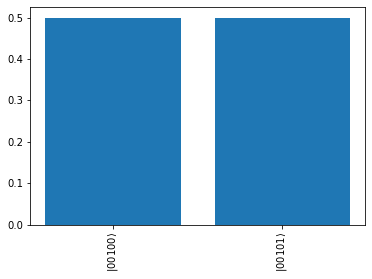

In [8]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# Application de l'oracle avec un qbit incorrect
p.apply(X, wires[2])

# Initialiser le qubit auxiliaire à |−⟩ = (|0⟩ - |1⟩) / sqrt(2)
p.apply(X, wires[n])
p.apply(H, wires[n]) 
p.apply(Uf(), wires)  

circuit = p.to_circ(box_routines=False)
circuit.display()
# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

 $\text{Si nous sommes dans un autre états que } \bar{k}\text{ au départ, on garde } ∣−⟩.\text{ Ainsi, étant donnée que x ne change pas, on a bien:}$
 $$ U_f |x, -\rangle = (-1)^{f(x)} |x, -\rangle$$

##### **$\underline{\textbf{Question 3 - Algorithme de Grover}}$**
>##### **$\textit{1 : Explication de l'algorithme de Grover}$**
On cherche un élément spécifique $\bar{k}$ dans un ensemble de taille $N = 2^n$, en utilisant une fonction oracle f telle que :
$$
f(x) =
\begin{cases}
\bar{k} & \text{si } x = \bar{k} \\
0 & \text{sinon}
\end{cases}
$$
L'algorithme repose sur des principes d'interférence quantique et d'amplification d'amplitude pour augmenter la probabilité de mesurer la solution correcte après un nombre optimal d'itérations.


#### Figure 1-2 :

1. **$\text{Initialisation des qubits :}$**
   - On commence par préparer n qubits dans l'état $|0\rangle$ et un qubit auxiliaire dans l'état $|1\rangle$, puis on applique une porte de Hadamard H à tous les qubits pour obtenir une superposition détats de probabilité uniforme :

     $$  |\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle $$  

   - Cette étape produit une superposition uniforme sur tous les états possibles de l'ensemble de recherche.

<br>

2. **$\text{Application de l'opérateur de Grover (G) :}$**
   - L'opérateur G est un circuit quantique qui combine deux étapes principales :
     - **Étape 1 : Oracle $U_f$ (fonction f)**  

       L'oracle encode la solution $\bar{k}$ dans une porte quantique réversible $U_x$. Lorsqu'il est appliqué, il marque la solution $\bar{k}$ en inversant la phase de l'état correspondant :
       $$
       U_f|x\rangle = (-1)^{f(x)}|x\rangle
       $$
       Cela signifie que la phase de l'état correspondant à $\bar{k}$ devient négative.

     - **Étape 2 : Amplification d'amplitude (diffusion de Grover)**  
       Cette étape augmente l'amplitude de l'état marqué. Elle utilise une combinaison des portes de Hadamard H et de réflexion autour de l'état moyen pour redistribuer l'amplitude.

#### Figure 3

3. **$\text{Réitération de l'opérateur G :}$**
   - L'opérateur G est appliqué plusieurs fois pour maximiser la probabilité de mesurer la solution correcte. Le nombre optimal d'itérations est donné par :
     $$
     R = (\left\lceil \frac{\pi}{4} \sqrt{N} \right\rceil)
     $$
   - Après ces itérations, la probabilité de mesurer $\bar{k}$ est proche de 1.

<br>

1. **$\text{Angle } \theta :$**  
   - Chaque application de l'opérateur G fait tourner l'état du système de recherche dans l'espace des états. L'angle de rotation est proportionnel à la solution marquée.

<br>

2. **$G  \text{ et }  G^2 :$**  
 La première application de  G  (à gauche) fait passer l'état initial à un angle $\theta/2$
   autour de la solution. La deuxième application (à droite) amplifie davantage l'amplitude de la solution en atteignant environ } $3\theta/2$,  augmentant ainsi la probabilité de mesurer de $ \bar{k}$ .



>##### **$\textit{2 : Implémentation du sous-circuit G}$**
##### **$\textit{2.1 : Implémentation de la porte R}$**
Dans notre cas, nous allons implémenter la porte R de facon à ce que le 3-qubits $|000\rangle$  deviennent $-|000\rangle$ et laisse les autres états inchangés.
Puis, nous allons appliquer la porte X à tous les qubits pour obtenir $|111\rangle$. La multiporte Z aura alors comme action de transformer ces qubits en $-|111\rangle$.
En réappliquant les portes X on retrouve l'état initial mais avec une amplitude de signe contraire.

Enfin, si nous sommes initialement dans un état différent de $|000\rangle$, il ne se passera rien car la multiporte Z n'aura aucun effet.

In [9]:

def porte_r():
    routine = QRoutine()
    wiresr = routine.new_wires(n+1)  # n + 1 qubits d'entrée
    
    # Applique X sur tous les qubits
    for i in range(n):
        routine.apply(X, wiresr[i])
        
    #Applique un multi Z
    routine.apply(Z.ctrl(n-1), wiresr[0:n-1], wiresr[n-1])
    
    # Applique X sur tous les qubits
    for i in range(n):
        routine.apply(X, wiresr[i])
    return routine
    

State |00000>, amplitude (-1+0j), probability 1.0


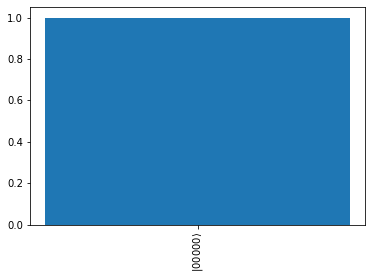

In [10]:
p = Program()
wires = p.qalloc(n+1)  # n qubits de recherche + 1 qubit auxiliaire

# Porte R avec |0>^n
porte_R = porte_r()  
p.apply(porte_R, wires) 

circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

In [11]:
# Dorénavant on met en place la porte R via la notatation R
R = AbstractGate("R", [], circuit_generator=porte_r)

State |10100>, amplitude (1+0j), probability 1.0


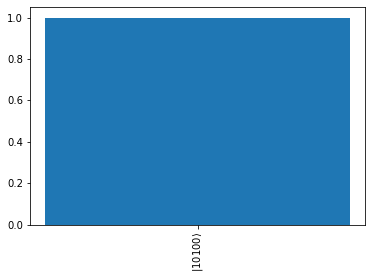

In [12]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# On a ici pas |0>^n 
p.apply(X, wires[2])
p.apply(X, wires[0])
p.apply(R(), wires)  


circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

##### **$\textit{2.2 : Implémentation du sous circuit G}$**

In [13]:
def porte_g():
    routineG = QRoutine()
    wires = routineG.new_wires(n+1)  # n qubits + 1 qubit auxiliaire

    # Étape 1 : Appliquer l'oracle Uf
    routineG.apply(Uf(), wires)

    # Étape 2 : Appliquer H sur les qubits de recherche
    for i in range(n):
        routineG.apply(H, wires[i])
        
    # Etape 3 : Applique R
    routineG.apply(R(),wires)
    
    # Etape 4 : Annuler les H
    for i in range(n):
        routineG.apply(H, wires[i])
    return routineG


State |00001>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00011>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00101>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00111>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01001>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01011>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01101>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01111>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |10001>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |10011>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |10101>, amplitude (0.8749999999999994+0j), probability 0.765624999999999
State |10111>, amplitude (-0.12499999999999989+0j), probability 0.01562499999999

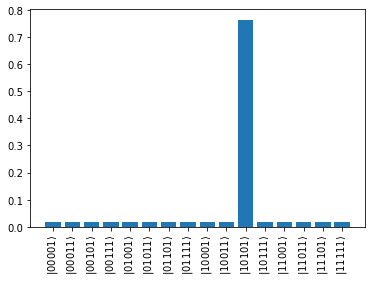

In [14]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

#On initialise le qbits à 5 
p.apply(X, wires[2])
p.apply(X, wires[0])

# Applique G
p_g = porte_g()  # On génère G
p.apply(p_g, wires)

circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

In [15]:
# Dorénavant on met en place la porte G via la notatation G
G = AbstractGate("G", [], circuit_generator=porte_g)

State |00000>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00010>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00100>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |00110>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01000>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01010>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01100>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |01110>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |10000>, amplitude (0.8749999999999994+0j), probability 0.765624999999999
State |10010>, amplitude (-0.12499999999999989+0j), probability 0.015624999999999972
State |10100>, amplitude (-0.12499999999999992+0j), probability 0.01562499999999998
State |10110>, amplitude (-0.12499999999999992+0j), probability 0.0156249999999

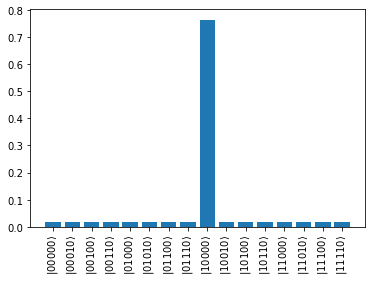

In [16]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

#On initialise le qbits à 1
p.apply(X, wires[0])
# Applique G
p.apply(G(), wires)

circuit = p.to_circ(box_routines=False)
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

>##### **$\textit{3 : Implémentation du circuit }$**

In [17]:
def circuit_Grover(rep):
    
    Grover = QRoutine()
    wiresg = Grover.new_wires(n + 1)  # n qubits + 1 qubit auxiliaire
    
    # Etape 2 : Porte H à tous les autres qbits
    for i in range(n) : 
        Grover.apply(H, wiresg[i])
        
    # Etape 3 : On applique la porte G rep fois    
    for i in range (0, rep): 
        Grover.apply(G(), wiresg)  # On applique l'oracle

    return Grover

$$
\left\lceil \frac{\pi}{4} \sqrt{N} \right\rceil =\left\lceil \frac{\pi}{4} \sqrt{2^n} \right\rceil =4
$$
Ainsi dans notre cas, il faut faire varier le nombre de répétitions entre 1 et 4.

State |00000>, amplitude (-0.11808130818642504+0j), probability 0.013943195343017488
State |00001>, amplitude (0.11808130818642504+0j), probability 0.013943195343017488
State |00010>, amplitude (-0.11808130818642504+0j), probability 0.013943195343017488
State |00011>, amplitude (0.11808130818642504+0j), probability 0.013943195343017488
State |00100>, amplitude (-0.1180813081864251+0j), probability 0.013943195343017502
State |00101>, amplitude (0.1180813081864251+0j), probability 0.013943195343017502
State |00110>, amplitude (-0.11808130818642504+0j), probability 0.013943195343017488
State |00111>, amplitude (0.11808130818642504+0j), probability 0.013943195343017488
State |01000>, amplitude (-0.118081308186425+0j), probability 0.01394319534301748
State |01001>, amplitude (0.118081308186425+0j), probability 0.01394319534301748
State |01010>, amplitude (-0.11808130818642502+0j), probability 0.013943195343017486
State |01011>, amplitude (0.11808130818642502+0j), probability 0.0139431953430

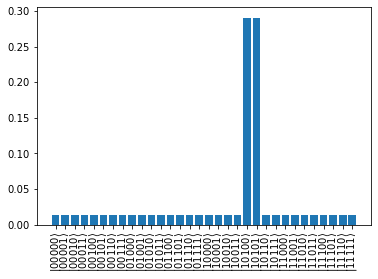

In [18]:
p = Program()
wires = p.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

# On part du qubit 0
# Etape 1 : ket moins sur le dernier qbits
p.apply(X, wires[n])
p.apply(H, wires[n])

# Application de l'algorithme avec 4 répétitions
Gro = circuit_Grover(4)  
p.apply(Gro, wires)  

circuit = p.to_circ(box_routines=False) 
circuit.display()

# Exécution du circuit
circuit = p.to_circ(submatrices_only=False)
result = PyLinalg().submit(circuit.to_job())
for sample in result:
    print("State %s, amplitude %s, probability %s" % (sample.state, sample.amplitude, sample.probability))

result.plot()

State |00000>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |00001>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |00010>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |00011>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |00100>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |00101>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |00110>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |00111>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |01000>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |01001>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |01010>, amplitude (-0.1325825214724775+0j), probability 0.01757812499999996
State |01011>, amplitude (0.1325825214724775+0j), probability 0.01757812499999996
State |011

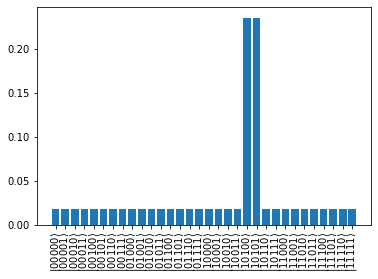

In [19]:
p3 = Program()
wires3 = p3.qalloc(n + 1)  # n qubits de recherche + 1 qubit auxiliaire

#On part du qubits 0
# Etape 1 : ket moins sur le dernier qubits
p3.apply(X, wires3[n])
p3.apply(H, wires3[n])  

# Application de l'algorithme avec 1 répitition
Gro1 = circuit_Grover(1)  
p3.apply(Gro1, wires3)  

circuit3 = p3.to_circ(box_routines=False)
circuit3.display()

# Exécution du circuit
circuit3 = p3.to_circ(submatrices_only=False)
result3 = PyLinalg().submit(circuit3.to_job())
for sample3 in result3:
    print("State %s, amplitude %s, probability %s" % (sample3.state, sample3.amplitude, sample3.probability))


result3.plot()

$\text{On remarque que plus le nombre d'itérations est grand plus la probabilité d'obtenir cinq est élevée.}$

$\text{De plus, il semblerait que le qubit auxilliaire soit proche de -|-}\rangle\text{ ce qui peut s'expliquer par le fait qu'il y a multiplication par un scalaire de R} $

>##### **$\textit{4 : Complexité}$**
Dans l'exercice 1, nous avons une solution classique pour rechercher un élément $ E_0 $ dans une liste non ordonnée. La complexité de cette solution est linéaire, soit $ \mathcal{O}(N) $, où $N=2^n$  est le nombre total d'entrées. Voici les étapes principales et leur complexité :

##### Recherche Séquentielle :

- On vérifie chaque élément de la liste jusqu'à trouver $E_0$.
Complexité : $ \mathcal{O}(N)$.  
- Pour chaque vérification, on utilise  le modulo pour vérifier si un élément divise ( E ).

##### Algorithme de Grover :
On trouve la solution avec $ (\left\lceil \frac{\pi}{4} \sqrt{N} \right\rceil)$ itérations
Complexité : $ \mathcal{O}(\sqrt{N}) $.

##### Conclusion
L'algorithme de Grover offre une amélioration quadratique de la complexité par rapport à la solution classique.